## Handling Missing Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking Null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['cabin_null']=np.where(df.Cabin.isnull(), 1, 0)

In [7]:
df['cabin_null'].mean()

0.7710437710437711

In [8]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Method 1: Median Imputation

### When should we apply? 

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [9]:
def impute_nan_median(df, variable): 
    median=df[variable].median()
    df[variable + "_median"]=df[variable].fillna(median)

In [10]:
impute_nan_median(df, 'Age')

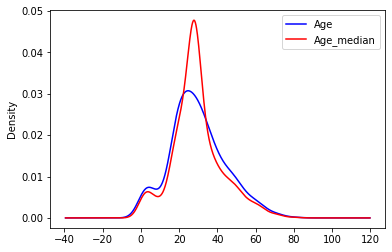

In [11]:
## Plot the distribution
df.Age.plot(kind='kde', c='blue', legend=True)
df.Age_median.plot(kind='kde', c='red', legend=True)

## Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset 

#### Disadvantages
- Change or Distortion in the original variance
- Impacts Correlation

### Method 2: Random Sample Imputation

Random Sample Imputation is a technique where we select random observations from datasets and use the same for replacing with nan values

### When to use it?
It assume that data is missing completely at Random

In [12]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
def impute_nan_randomsample(df, variable):
    df[variable + "_randomSample"]=df[variable]
    random_sample = df.Age.dropna().sample(df.Age.isnull().sum(), random_state=0)
    random_sample.index = df[df.Age.isnull()].index
    df.loc[df.Age.isnull(),'Age_randomSample'] = random_sample

In [14]:
impute_nan_randomsample(df, 'Age')

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_randomSample
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [16]:
def impute_nan_median(df, variable): 
    median=df[variable].median()
    df[variable + "_median"]=df[variable].fillna(median)
    
impute_nan_median(df, 'Age')

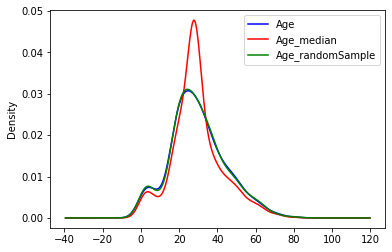

In [17]:
## Plot the distribution
df.Age.plot(kind='kde', c='blue', legend=True)
df.Age_median.plot(kind='kde', c='red', legend=True)
df.Age_randomSample.plot(kind='kde', c='green', legend=True)

## Advantages
- Easy To implement
- There is less distortion in variance

### Disadvantage
- Every situation randomness wont work

### Method 3: Capturning NAN with New Features

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
def impute_nan_newfeature(df, variable): 
    
    df[variable + "_NAN"] = np.where(df[variable].isnull(), 1, 0)
    df[variable].fillna(df[variable].median(), inplace=True)

In [20]:
impute_nan_newfeature(df,'Age')

In [21]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NAN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


### Advantages

- Easy to implement
- Captures the importance of missing values

### Disadvantages
- Creating Additional Features(Curse of Dimensionality)

### Method 4: End of Distribution Imputation

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
def impute_nan_endofdistribution(df, variable):
    df[variable + "_EndOfDistribution"] = df[variable].fillna(df[variable].mean() + 3*df[variable].std())
    df[variable + "_median"]= df[variable].fillna(df[variable].median())

In [24]:
impute_nan_endofdistribution(df, 'Age')

In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_EndOfDistribution,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00000,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00000,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00000,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00000,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,73.27861,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.00000,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.00000,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.00000,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.00000,14.0


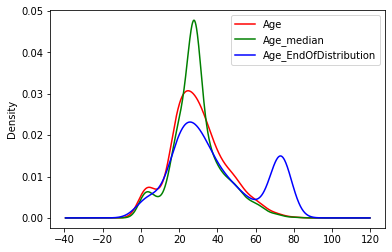

In [26]:
### Plot the distribution

df.Age.plot(kind='kde', c='red', legend = True)
df.Age_median.plot(kind='kde', c='green', legend = True)
df.Age_EndOfDistribution.plot(kind='kde', c='blue', legend = True)

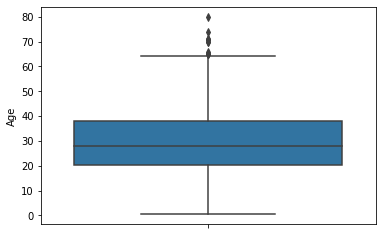

In [27]:
import seaborn as sns
sns.boxplot(y='Age', data=df)

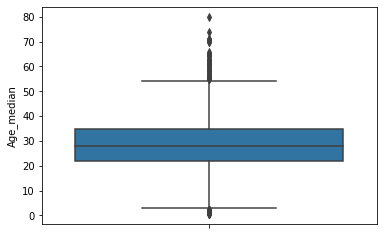

In [28]:
sns.boxplot(y='Age_median', data=df)

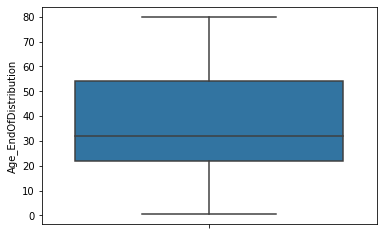

In [29]:
sns.boxplot(y='Age_EndOfDistribution', data=df)

### When should we use this approach?
- Applied when NA are not missing at random. 
- The rationale is that if the value is missing, it has to be for a reason, therefore, we would not like to replace missing values for the mean and make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.

### Disadvantages:

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- If the number of NA is big, it will mask true outliers in the distribution
- If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of feature engineering

### Method 5: Arbitary Imputation

In [30]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
def impute_nan_arbitrary(df, variable): 
    df[variable + "_arbitrary"] = df[variable].fillna(100)    

In [32]:
impute_nan_arbitrary(df, 'Age')

In [33]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_arbitrary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,100.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0


Applied when NA are not missing at random
When variables are captured by third parties, like credit agencies, they place arbitrary numbers already to signal this missingness. 
So if not common practice in data competitions, it is common practice in real life data collections.

### Disadvantages:

- Distorts the original distribution of the variable
-  If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use If the value is outside the distribution it may mask or create outliers


The arbitrary value has to be determined for each variable specifically. For example, for this dataset, the choice of replacing NA in age by 0 or 100 are valid, because none of those values are frequent in the original distribution of the variable, and they lie at the tails of the distribution.

However, if we were to replace NA in fare, those values are not good any more, because we can see that fare can take values of up to 500. So we might want to consider using 500 or 1000 to replace NA instead of 100.

As you can see this is totally arbitrary. And yet, it is used in the industry. Typical values chose by companies are -9999 or 9999, or similar.

### Method 6: Mode Imputation

In [34]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
def impute_nan_mode(df, variable): 
    mode=df[variable].mode()[0]
    df[variable] = df[variable].fillna(mode)

In [36]:
impute_nan_mode(df, 'Embarked') 

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Method 7: Adding new category "Unknown"

In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
def impute_nan_unknown(df, variable): 
    df[variable] = df[variable].fillna('Unknown')

In [41]:
impute_nan_unknown(df, 'Embarked') 

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.Embarked.value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

### Method 8: KNN Imputer

This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values.

In [44]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age','SibSp','Parch','Fare','Sex','Embarked'])
df.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked
0,male,22.0,1,0,7.2500,S
1,female,38.0,1,0,71.2833,C
2,female,26.0,0,0,7.9250,S
3,female,35.0,1,0,53.1000,S
4,male,35.0,0,0,8.0500,S
5,male,NaN,0,0,8.4583,Q
6,male,54.0,0,0,51.8625,S
7,male,2.0,3,1,21.0750,S
8,female,27.0,0,2,11.1333,S
9,female,14.0,1,0,30.0708,C


In [45]:
### Encode the categorical varibales
cat_variables=df[['Sex','Embarked']]
cat_variables = pd.get_dummies(cat_variables, drop_first=True)

df.drop(['Sex','Embarked'], axis=1, inplace=True)
df=pd.concat([df, cat_variables], axis=1)
df.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,1,0,1


In [46]:
## Scaling needs to be perfomred since it is using eucledian distances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
5,NaN,0.000,0.000000,0.016510,1.0,1.0,0.0
6,0.673285,0.000,0.000000,0.101229,1.0,0.0,1.0
7,0.019854,0.375,0.166667,0.041136,1.0,0.0,1.0
8,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0
9,0.170646,0.125,0.000000,0.058694,0.0,0.0,0.0


In [47]:
### Apply KNN Imputer
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df)
df=pd.DataFrame(df_filled, columns=df.columns)

In [48]:
df.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
5,0.595376,0.000,0.000000,0.016510,1.0,1.0,0.0
6,0.673285,0.000,0.000000,0.101229,1.0,0.0,1.0
7,0.019854,0.375,0.166667,0.041136,1.0,0.0,1.0
8,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0
9,0.170646,0.125,0.000000,0.058694,0.0,0.0,0.0
